<a href="https://colab.research.google.com/github/034adarsh/House-Price-Prediction/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## House Price Prediction Model

Step-1: Import the required libraries

In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import plotly.express as px

Step-2: Loading the dataset

In [56]:
ds = pd.read_csv('SetB_dataset.csv')

# Printing the data description 
ds.head()

,Size,No. of bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


Step-3: Visualizaing the dataset through different charts

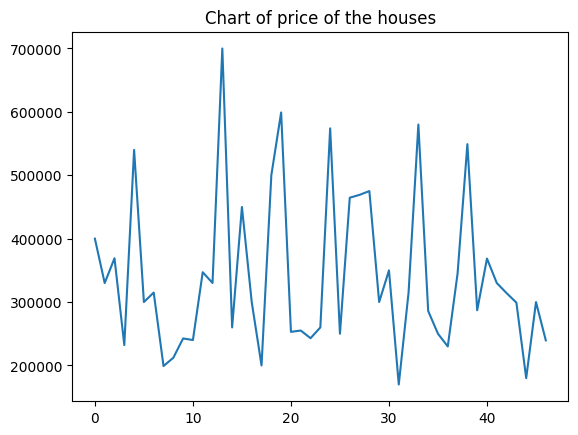

In [57]:
plt.title("Chart of price of the houses")
plt.plot(ds.Price)

In [58]:
fig = px.pie(ds, values= 'Size', names='No. of bedrooms', title = 'No. of bedrooms vs Size of the house')
fig.show()

In [59]:
fig = px.sunburst(ds,
                  path = ['No. of bedrooms', 'Price'],
                  color = 'Size', title = 'Sunburst Chart of the dataset')
fig.show()

In [60]:

fig = px.scatter_3d(ds, x = 'Price', y = 'No. of bedrooms',z='Size',color='No. of bedrooms', title = "3d chart of the dataset"
                    )
fig.show()

Step-4: Splitting the dataset

In [62]:
X = ds.drop('Price', axis=1)
y = ds['Price']

"""Spliting the dataset into 8:2 ratio. 
      80% for training the model and 20% for testing the model."""

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Step-5: Creating the linear regression model

In [63]:
model = LinearRegression()

Step-6: Training the model

In [64]:
model.fit(X_train, y_train)

LinearRegression()

In [69]:
# Printing the regression parameters

print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

Intercept: 84763.62252219388
Coefficients: [   143.21853204 -13512.56442597]


Step-7: Testing the model

In [66]:
y_pred = model.predict(X_test)
print(y_pred)

[405995.94117864 340351.83108993 253038.54895937 216088.16769291
 601346.01888191 221673.69044249 314908.95480087 464808.73543314
 460368.96093988 201766.31448886]


Step-8: Evaluating the model

In [68]:
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
print('Root Mean Squared Error:', rmse)
percentage_rmse = (rmse / (y.max() - y.min())) * 100

print('RMSE in percentage:', percentage_rmse)

Root Mean Squared Error: 92792.37331148329
RMSE in percentage: 17.50799496443081


Step-9: Calculating R2 score

In [70]:
r2_score = model.score(X_test, y_test)

print('R2 Score:', r2_score)

R2 Score: 0.5148848812741439


Step-10: Visualizing the final results (True Values vs Predicted Values)

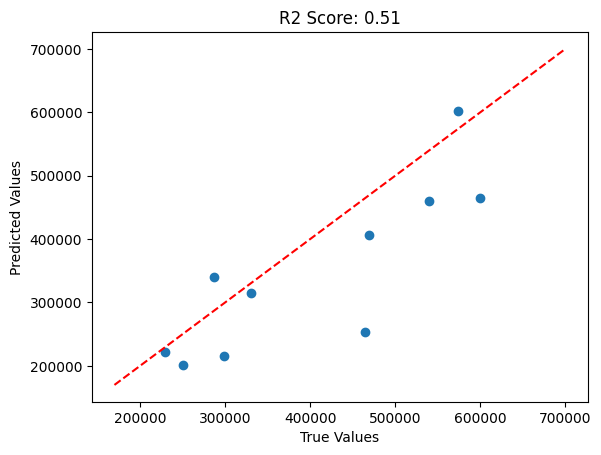

In [72]:
plt.scatter(y_test, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title(f'R2 Score: {r2_score:.2f}')
plt.show()